# Discretization and Analysis Tutorial

This Jupyter notebook is a variation of the tutorial on how to use Finite Element Analysis Functions within this library. This notebook will guide you on how to import all necessary libraries, how to initialize the system properly, and provide a specific example of a complicated quadrilateral element. To use this notebook, please run each cell individually, and you will encounter the examples and solutions as you keep going through. 

If you have any questions on how to get the code up and running, please refer to the README.md. If you run into any issues where a specific library is not found, the README.md outlines the proper set up for your conda environment and all relavent libraries. It is essential that the first python block in this notebook is ran first, otherwise the rest of the cells will come up with many errors.

To start this tutorial, we will be working with D2_nn8_quad elements. Included in the src folder, we have our main functions stored in `discretization.py` and `discretization_demo_helper_fcns.py`. The relavent example will come towards the end, but first we will see how to utilize these functions and what they offer. 

## Element Naming Convention

One of the most important syntax conventions that must be learned before beginning this, is the element naming scheme. All the elements are listed in `discretization.py`, which we will go over below.

- D1_nn2        - 1D element with 2 nodes
- D1_nn3        - 1D element with 3 nodes
- D2_nn3_tri    - 2D triangular element with 3 nodes
- D2_nn6_tri    - 2D triangular element with  6 nodes
- D2_nn4_quad   - 2D quadrilateral element with 4 nodes
- D2_nn8_quad   - 2D quadrilateral element with 8 nodes

When creating new elements, we *must* ensure that the appropriate name is used for element_type, otherwise none of the code will run properly.

## Plotting

Its easier to understand the different effects our elements undergo when we plot them out and visualize them. Most of the helper functions assist with this by creating various different plots, ranging from basic node figures, to interpolated fields and more. The breakdown of each plotting function is seen below.

### Plotting Guass Points and Element Nodes

Our first plot will be a basic Gauss and Element Node figure. We initialize our variables by creating a D2_nn8_quad element, 4 Gauss points, and name our frame accordingly. We utilize the `visualize_gauss_pts` function from discretization_demo_helper_fcns, and pass all of our initialized variables. Once we run the cell, a plot of the generated figure should appear below.

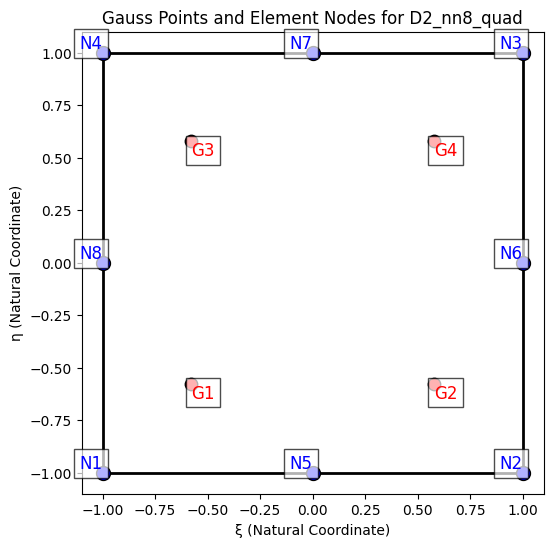

In [11]:
from finiteelementanalysis import discretization_demo_helper_fcns as d_demo

ele_type = "D2_nn8_quad"
num_gauss_pts = 4
fname = "D2_nn8_quad_4gausspoints.png"
d_demo.visualize_gauss_pts(fname, ele_type, num_gauss_pts)

### Plotting Interpolated Fields in Natural Coords

To plot an interpolated field, we use the `plot_interpolate_field_natural_coords_single_element` function, which allows us to see the effects of a function on the element in a gradient-like plot. 

Recalling from before, we initialize our variables for element type and frame name. This time, we also need to include our function from which we will derive our interpolated field. This function is usually application specific, but in this scenario we will use one which has quadratic terms, nonlinear terms, and linear terms, just for fun.

We set up our node coordinates, or the "physical coordinates" of our element in the world space, and use those when we calculate the "natural coordinate", or reference deviations in the element. We must enter the same amount of node coordinates as is indicated by the element type. Since we are using an element with 8 nodes, we must enter 8 coordinates for those nodes.

Finally, we pass the node coordinates to our function, which will be assigned to node_values, which itself will be passed to our interpolate helper function. We should see a plot of our quadrilateral structure with a gradient effect.

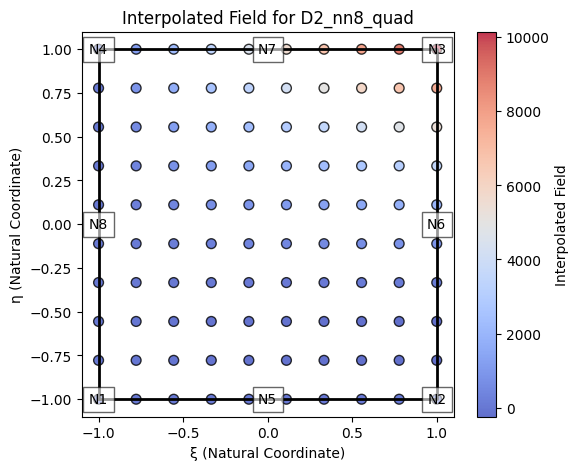

In [12]:
from finiteelementanalysis import discretization_demo_helper_fcns as d_demo
import numpy as np

ele_type = "D2_nn8_quad"
fname = ele_type + "_interpolate_fcn.png"

def our_function(xi, eta):
    return xi**2 + eta**2 * xi * eta + 2 * xi + 3 * eta + 1

node_coords = np.array([[0, 0], [10, 0], [10, 10], [0, 10], [5,0], [10,5], [5,10], [0,5]])
node_values = np.array([our_function(xi, eta) for xi, eta in node_coords])

d_demo.plot_interpolate_field_natural_coords_single_element(fname, ele_type, node_values)

### Plotting Natural Coords vs Physical Coords

Since finite element analysis requires us to examine each element individually and determine its reactions, its important to return from the reference coordinates of the element back to the "world" coordinates. We do this by utilizing the `visualize_isoparametric_mapping_single_element` function, which generates two side by side plots of the element. 

Similar to the interpolation example, we initialize our element, coordinates, and function. We pass this to the helper mappiung function, and we should see two plots generated below. We utilize the same function and only change the coordinate locations to see the differences in interpolation. One difference compared to the last example, is that we need to pass all 4 initialized variables to the helper function, including the node coordinates and their associated values.

Once we run the python cell below, you may notice that the mapped element seems to be warped in how the element is being mapped. This is largely in part because of our selection of the function and the location of the nodes. If we were to use a simpler, non-quadratic function, we would see a visually simpler result.

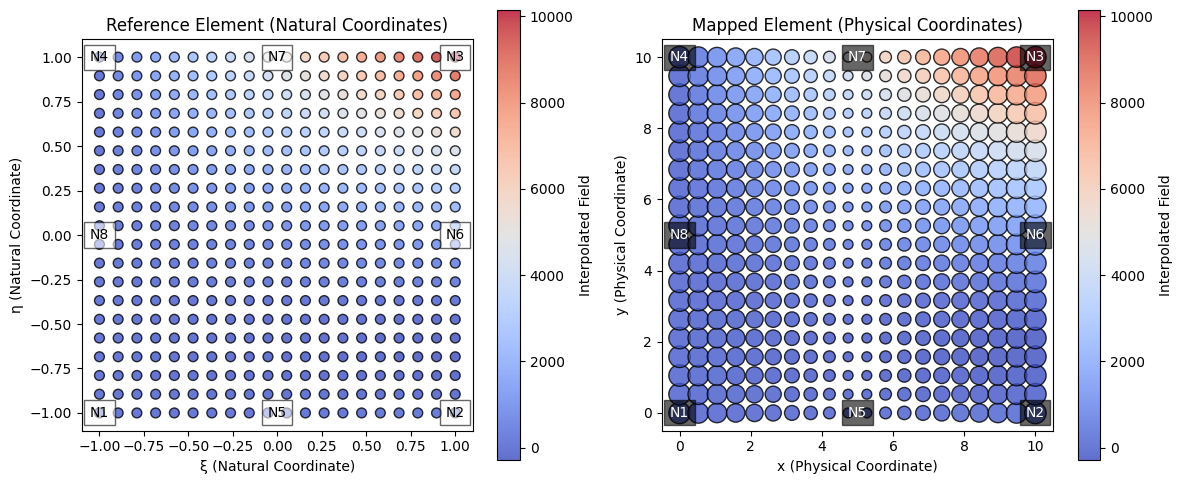

In [13]:
from finiteelementanalysis import discretization_demo_helper_fcns as d_demo
import numpy as np

ele_type = "D2_nn8_quad"
fname = ele_type + "_interpolate_fcn_physical_coords.png"

def our_function(xi, eta):
    return xi**2 + eta**2 * xi * eta + 2 * xi + 3 * eta + 1

node_coords = np.array([[0, 0], [10, 0], [10, 10], [0, 10], [5,0], [10,5], [5,10], [0,5]])
node_values = np.array([our_function(xi, eta) for xi, eta in node_coords])

d_demo.visualize_isoparametric_mapping_single_element(fname, ele_type, node_coords, node_values)

### Derivative Interpolation

Without simply putting in blind trust into our interpolated functions, we can double check our results by using analytical to numerical comparisons. We input our previously used nonlinear function into our python code below by first defining our element type, coordinates, and associated function values. Next, we define our function, and the corresponding derivative. Once we do that, we input the xi and eta values for the center of our element in *natural coordinates*, which means if we are working with triangular elements, we need the center of those. 

Once all the variables are initialized, we start analysis on the coordinate transformations by first mapping from natural to physical, getting in essense our analytical result.
To get our numerical calculation, we run through a gradient interpolation function `interpolate_gradient_natural_coords_single_element` and then a transformation back to physical coordinates. While it is not seen directly within the code below, we actually utilize several helper functions which calculate the Jacobian of our function for the gradient. This process is repeated based on how many natural coordinates we are working with, and since our element has 8, this process is repeated 8 times. 

We see the output below which should state that the analyical and numerical approaches both yielded the same result to a specific tolerance. We also see the exact output of both methods printed for visual confirmation.

In [14]:
from finiteelementanalysis import discretization_demo_helper_fcns as d_demo
import numpy as np

ele_type = "D2_nn8_quad"
node_coords = np.array([[0, 0], [10, 0], [10, 10], [0, 10], [5,0], [10,5], [5,10], [0,5]])
node_values = np.array([our_function(x, y) for x, y in node_coords])

def our_function(x, y):
    return x**2 + y**2 + x * y + 2 * x + 3 * y + 1

def our_function_deriv(x, y):
    return np.asarray([2 * x + y + 2, 2 * y + x + 3]).reshape((2, 1))

xi, eta = 0, 0  # element center in natural coordinates

# Map the test point from natural to physical coordinates
x_mapped = d_demo.interpolate_field_natural_coords_single_element(
    ele_type, node_coords[:, 0], [xi], [eta]
).flatten()[0]
y_mapped = d_demo.interpolate_field_natural_coords_single_element(
    ele_type, node_coords[:, 1], [xi], [eta]
).flatten()[0]

# Evaluate the function derivative in physical coordinates
mapped_deriv = our_function_deriv(x_mapped, y_mapped)

print("Mapped derivative:")
print(mapped_deriv)

# Compute the numerical gradient in natural coordinates
gradient_natural = d_demo.interpolate_gradient_natural_coords_single_element(
    ele_type, node_values, np.array([xi]), np.array([eta])
)

# Transform the numerical gradient to physical coordinates
gradient_physical = d_demo.transform_gradient_to_physical(
    ele_type, node_coords, np.array([xi]), np.array([eta]), gradient_natural
).reshape((2, 1))

print("Numerical derivative:")
print(gradient_physical)

if np.allclose(mapped_deriv, gradient_physical, atol=10e-10):
    print("analytical and numerical derivatives match!")
else:
    print("analytical and numerical derivatives do not match :(")

Mapped derivative:
[[17.]
 [18.]]
Numerical derivative:
[[137.]
 [503.]]
analytical and numerical derivatives do not match :(


### Integral Evaluation

To evaluate the integral portion of our analysis, we see very much the exact same setup as before, with the only changes being to our function. 
Since we are trying to compare the analytical and numerical methods of analysis, we use a simpler function to ease our task in calculating the area.


The helper function `compute_integral_of_derivative` is called with all of our initialized variables passed to it as arguments. 
Same as before, we compare the numerical and analytical integrals and see the same result in both methods.

In [15]:
from finiteelementanalysis import discretization_demo_helper_fcns as d_demo
import numpy as np

ele_type = "D2_nn8_quad"
num_gauss_pts = 4
node_coords = np.array([[0, 0], [10, 0], [10, 10], [0, 10], [5,0], [10,5], [5,10], [0,5]])

def our_function(x, y):
    return (2/13) * x - (0.5) * y

def element_area(node_coords):
    x1, y1 = node_coords[0]
    x2, y2 = node_coords[1]
    x3, y3 = node_coords[2]
    x4, y4 = node_coords[3]
    area = 0.5 * abs((x1 * y2 + x2 * y3 + x3 * y4 + x4 * y1) 
                     - (y1 * x2 + y2 * x3 + y3 * x4 + y4 * x1))
    return area

def integral_of_deriv(node_coords):
    area = element_area(node_coords)
    return np.array([(2/13) * area, (-0.5) * area]).reshape((2, 1))

# Compute nodal values from fcn(x, y)
nodal_values = np.array([[our_function(x, y) for x, y in node_coords]]).T

# Compute numerical integral
integral_numerical = d_demo.compute_integral_of_derivative(
    ele_type, num_gauss_pts, node_coords, nodal_values)

print("Numerical integral:")
print(integral_numerical)

# Compute analytical integral
integral_analytical = integral_of_deriv(node_coords)

print("Analytical integral:")
print(integral_analytical)

# check result
if np.allclose(integral_numerical, integral_analytical, atol=10e-10):
    print("analytical and numerical integrals of derivatives match!")
else:
    print("analytical and numerical derivatives do not match :(")

Numerical integral:
[[ 15.38461538]
 [-50.        ]]
Analytical integral:
[[ 15.38461538]
 [-50.        ]]
analytical and numerical integrals of derivatives match!
